[![Roboflow Notebooks](https://media.roboflow.com/notebooks/template/bannertest2-2.png?ik-sdk-version=javascript-1.4.3&updatedAt=1672932710194)](https://github.com/roboflow/notebooks)

# START

In [1]:
!nvidia-smi

Mon Jan  1 16:25:32 2024       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.161.03   Driver Version: 470.161.03   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  Tesla T4            Off  | 00000000:00:05.0 Off |                    0 |
| N/A   

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/kaggle/working


## Install YOLOv8

In [3]:
!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.232 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15110MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5310.5/8062.4 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

# Download dataset

In [5]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="NUB1ParPqXzNdVKa9Qzh")
project = rf.workspace("neural-ocean").project("neural_ocean")
dataset = project.version(3).download("yolov8")

/kaggle/working/datasets
  Obtaining dependency information for roboflow from https://files.pythonhosted.org/packages/f7/69/530445f36a3435638a7d137a3e60590f2fc68c46260623ca57c108110b4f/roboflow-1.1.14-py3-none-any.whl.metadata
  Obtaining dependency information for certifi==2023.7.22 from https://files.pythonhosted.org/packages/4c/dd/2234eab22353ffc7d94e8d13177aaa050113286e93e7b40eae01fbf7c3d9/certifi-2023.7.22-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 1.8 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.8 MB/s eta 0:00:00
  Obtaining dependency information for opencv-python-headless==4.8.0.74 from https://files.pythonhosted.org/packages/76/02/f128517f3ade4bb5f71e2afd8461dba70e3f466ce745fa1fd1fade9ad1b7/opencv_python_headless-4.8.0.74-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 5.4 MB/s eta 0:00:00
  Obtaining dependency info

A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.232, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Neural_Ocean-3 in yolov8:: 100%|██████████| 10266/10266 [00:01<00:00, 8952.63it/s]


## Custom Training

In [6]:
%%writefile /kaggle/working/datasets/Neural_Ocean-3/data.yaml
names:
- Mask
- can
- cellphone
- electronics
- gbottle
- glove
- metal
- misc
- net
- pbag
- pbottle
- plastic
- rod
- sunglasses
- tire
nc: 15
roboflow:
  license: CC BY 4.0
  project: underwater-65x5j
  url: https://universe.roboflow.com/project/underwater-65x5j/dataset/3
  version: 3
  workspace: project
test: test/images
train: train/images
val: valid/images

Overwriting /kaggle/working/datasets/Neural_Ocean-3/data.yaml


In [16]:
%cd /kaggle/working/
!yolo task=detect mode=train model=yolov8n.pt data={dataset.location}/data.yaml epochs=100 imgsz=416 plots=True device=0,1

/kaggle/working
Ultralytics YOLOv8.0.232 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15110MiB)
                                                       CUDA:1 (Tesla T4, 15110MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/working/datasets/Neural_Ocean-3/data.yaml, epochs=100, time=None, patience=50, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=(0, 1), workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_fr

In [17]:
!ls {HOME}/runs/detect/train2/

F1_curve.png					   train_batch1.jpg
PR_curve.png					   train_batch2.jpg
P_curve.png					   train_batch20430.jpg
R_curve.png					   train_batch20431.jpg
args.yaml					   train_batch20432.jpg
confusion_matrix.png				   val_batch0_labels.jpg
confusion_matrix_normalized.png			   val_batch0_pred.jpg
events.out.tfevents.1704129515.b1eb17f1159e.428.0  val_batch1_labels.jpg
labels.jpg					   val_batch1_pred.jpg
labels_correlogram.jpg				   val_batch2_labels.jpg
results.csv					   val_batch2_pred.jpg
results.png					   weights
train_batch0.jpg


/kaggle/working


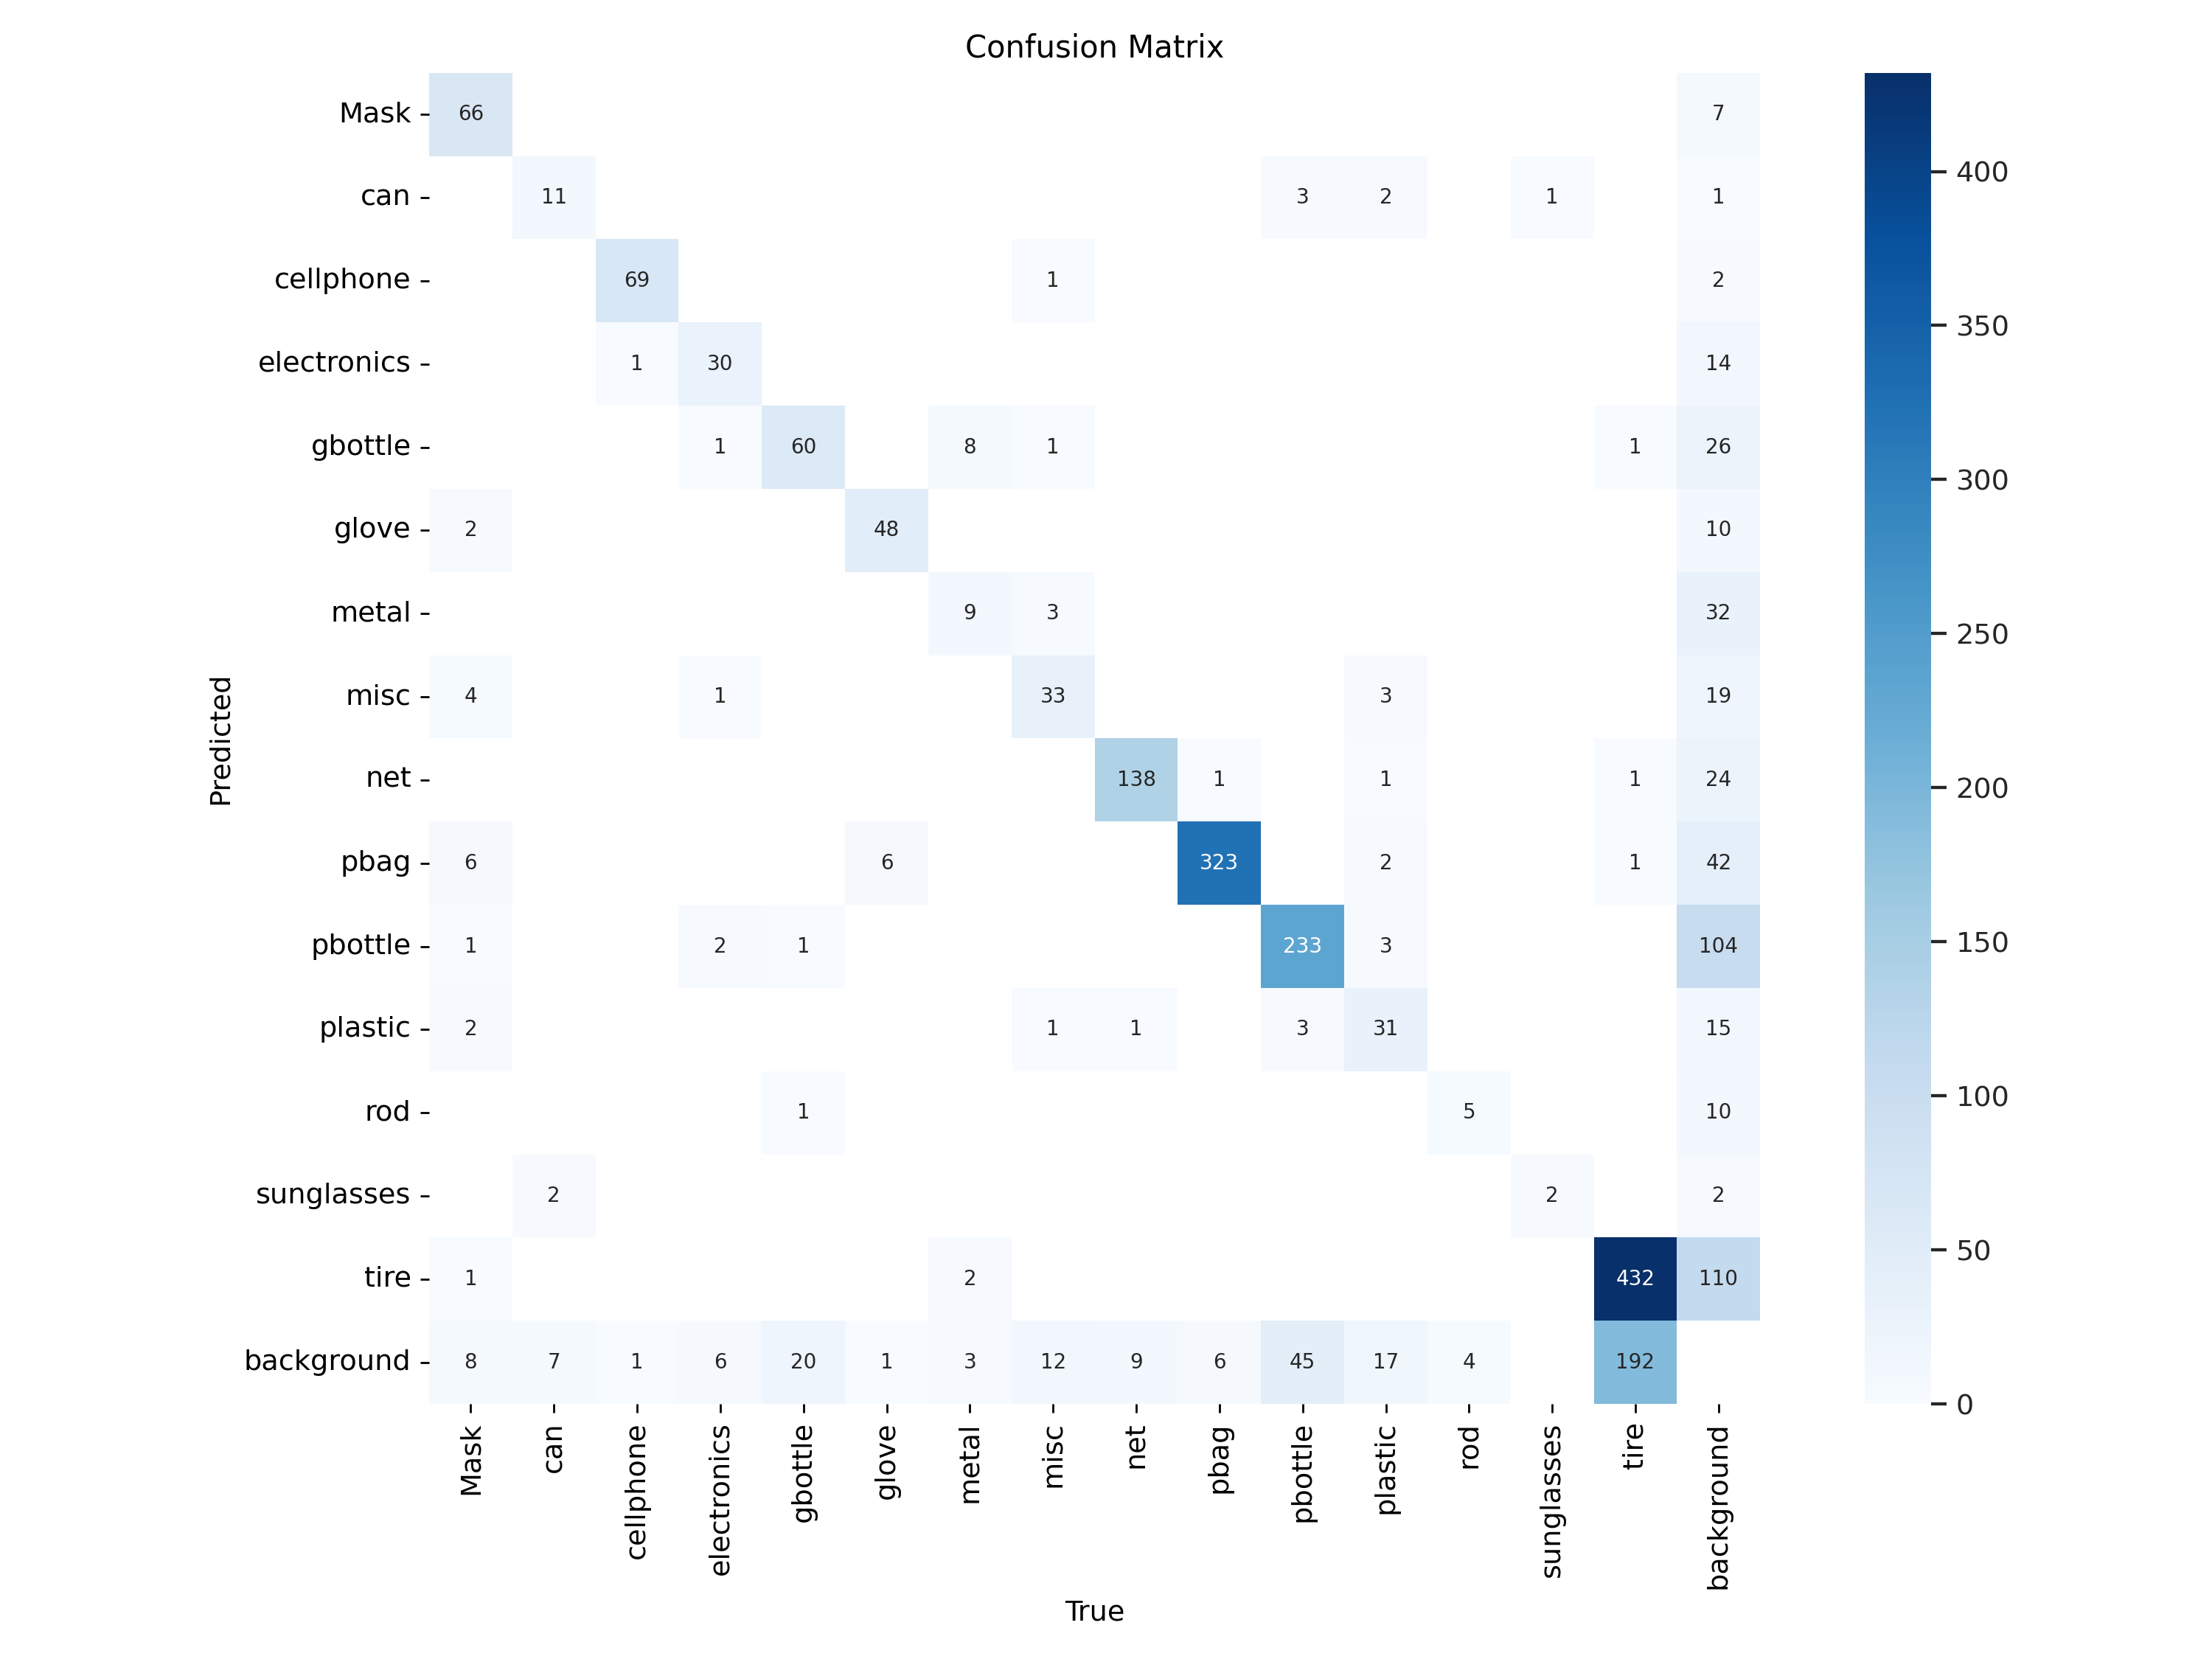

In [18]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/confusion_matrix.png')

/kaggle/working


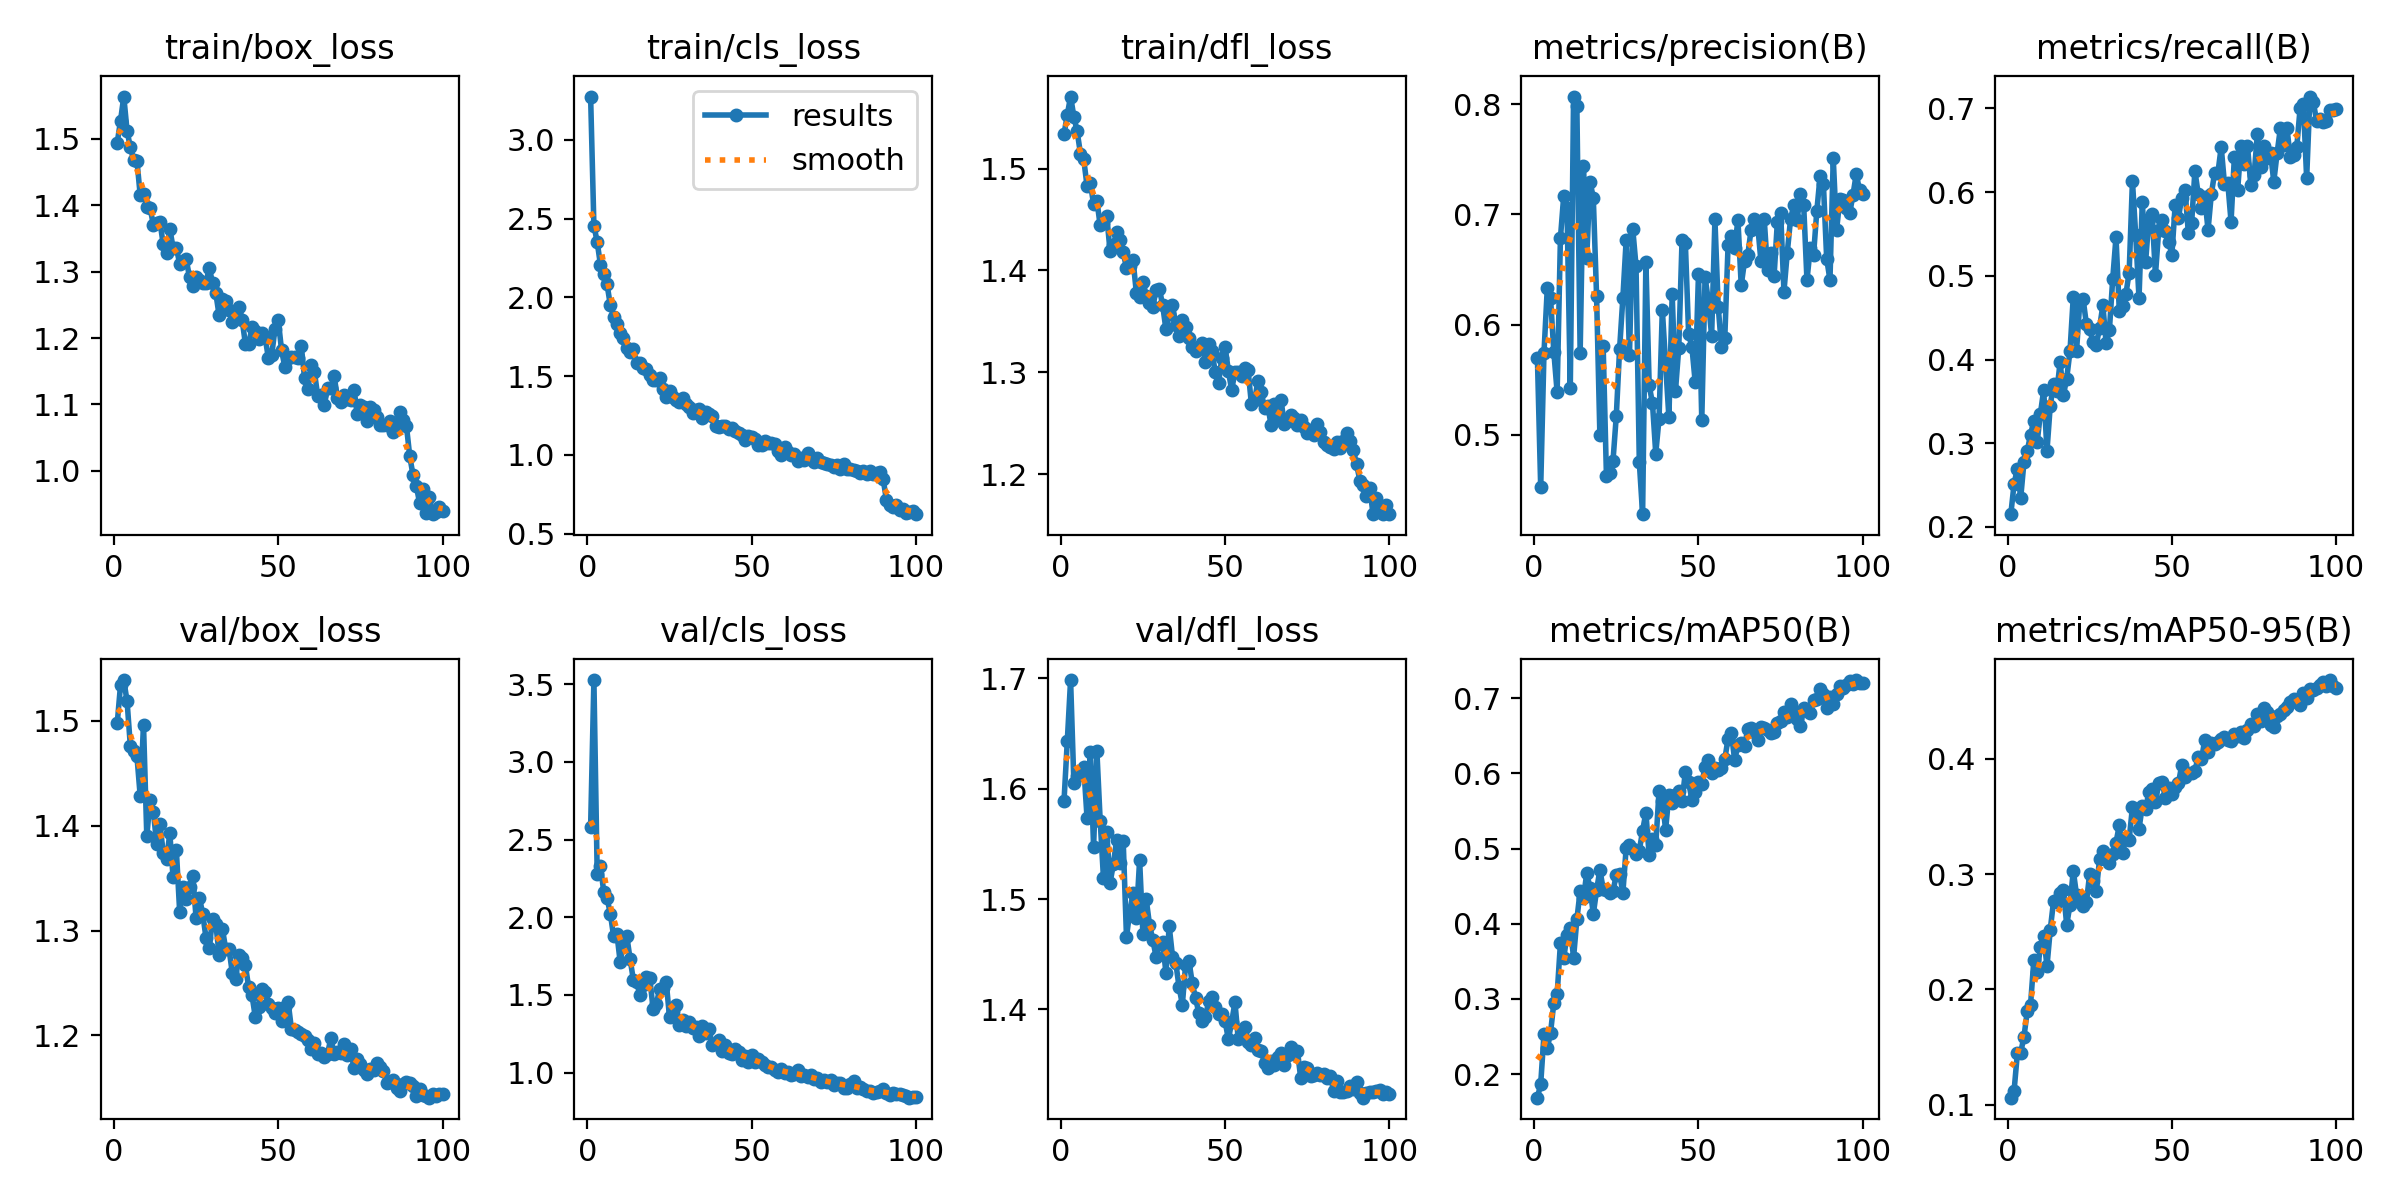

In [19]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/results.png')

/kaggle/working


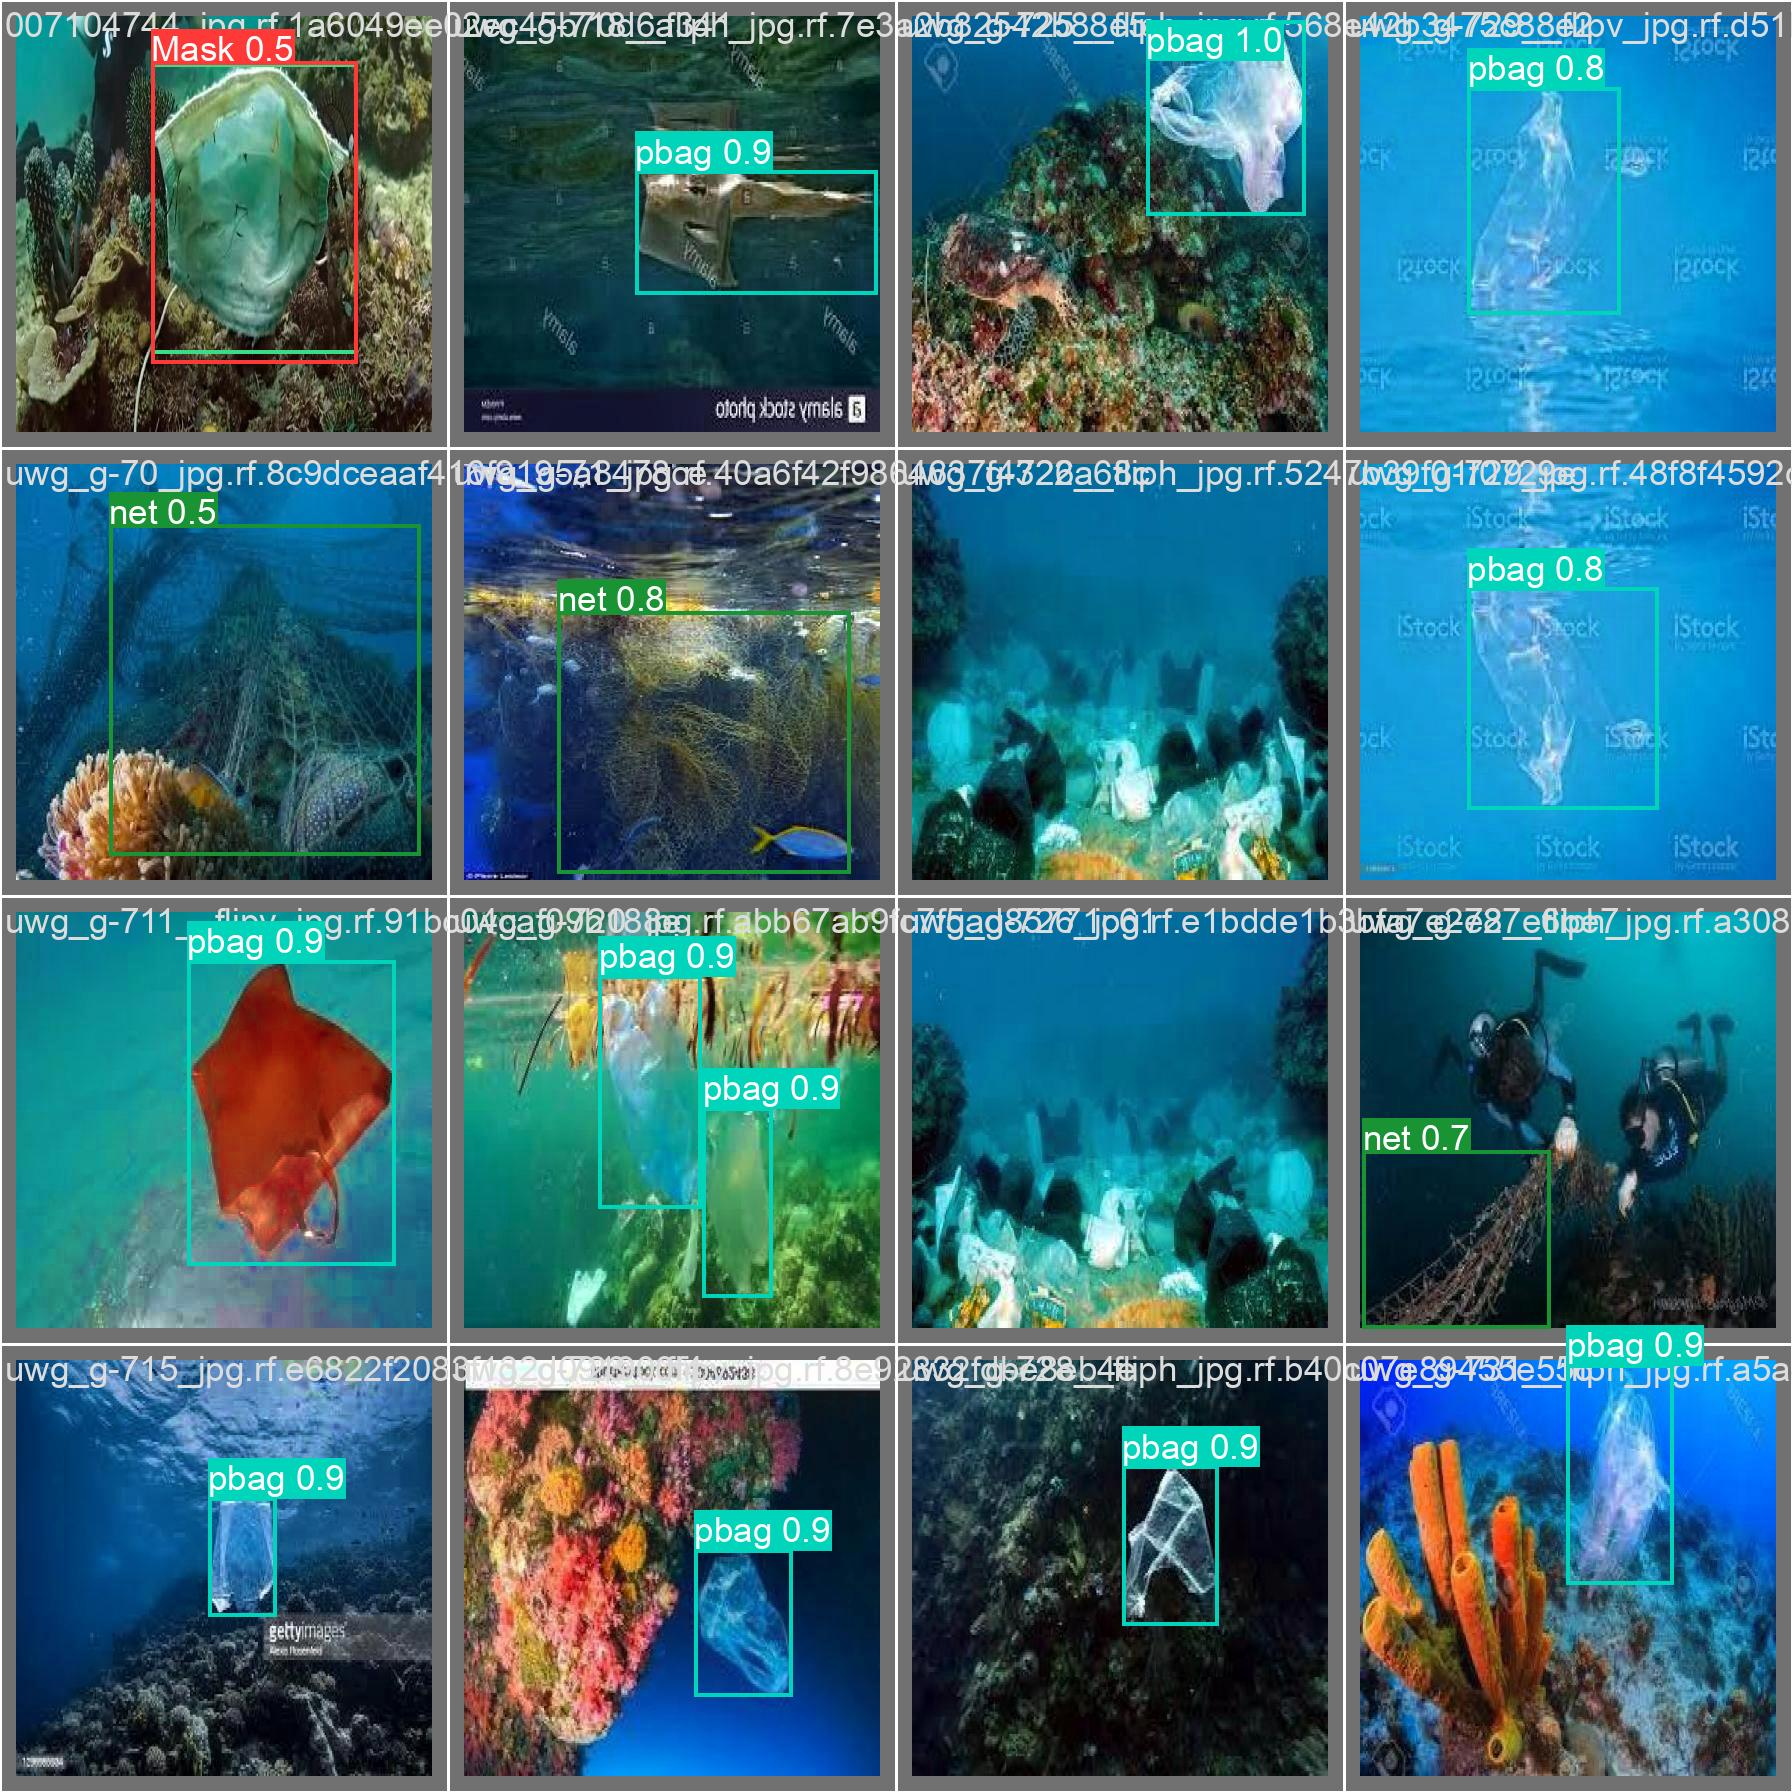

In [20]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/val_batch0_pred.jpg')

## Validate Custom Model

In [21]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train2/weights/best.pt data={dataset.location}/data.yaml device=0,1

/kaggle/working
Ultralytics YOLOv8.0.232 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15110MiB)
                                                       CUDA:1 (Tesla T4, 15110MiB)
Model summary (fused): 168 layers, 3008573 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /kaggle/working/datasets/Neural_Ocean-3/valid/labels.cache... 1000
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all       1000       1891      0.735        0.7      0.725      0.468
                  Mask       1000         90      0.955      0.714      0.885      0.655
                   can       1000         20      0.566      0.392      0.553      0.214
             cellphone       1000         71      0.986      0.972      0.987       0.85
           electronics       1000         40      0.824       0.75      0.764      0.455
               gbottle       1000         82      0.718      0.695       0.73      0.533
                 glove       1000         55

## Inference with Custom Model

In [22]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train2/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True device=0,1

/kaggle/working
Ultralytics YOLOv8.0.232 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15110MiB)
                                                       CUDA:1 (Tesla T4, 15110MiB)
Model summary (fused): 168 layers, 3008573 parameters, 0 gradients, 8.1 GFLOPs

image 1/501 /kaggle/working/datasets/Neural_Ocean-3/test/images/1bc7-iudfmpmn7245599_jpg.rf.0c27f6617b1c2d7665a4badbb8474e28.jpg: 416x416 1 glove, 10.5ms
image 2/501 /kaggle/working/datasets/Neural_Ocean-3/test/images/200623160205-05-coronavirus-waste-pollution-super-169_jpg.rf.2cb8ff79c143c7677ba333349c528e23.jpg: 416x416 1 pbottle, 1 plastic, 6.0ms
image 3/501 /kaggle/working/datasets/Neural_Ocean-3/test/images/66b85ac2-5d1b-4783-b0fa-4f8adcda51a5_jpg.rf.6e27d3429e5c183f0785e36626e232c2.jpg: 416x416 2 Masks, 1 pbag, 1 pbottle, 6.2ms
image 4/501 /kaggle/working/datasets/Neural_Ocean-3/test/images/7_JPG_jpg.rf.c73c6cc42828be1d9a13a8a520607ca8.jpg: 416x416 1 Mask, 1 net, 6.0ms
image 5/501 /kaggle/working/datasets/Neural_Ocean-3/te

**NOTE:** Let's take a look at few results.

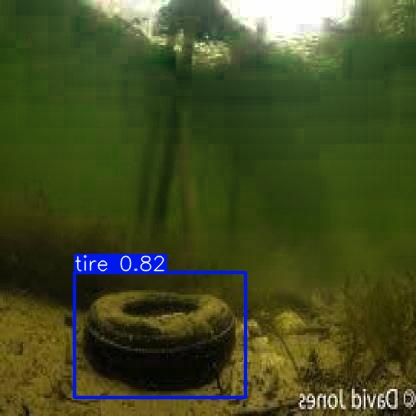

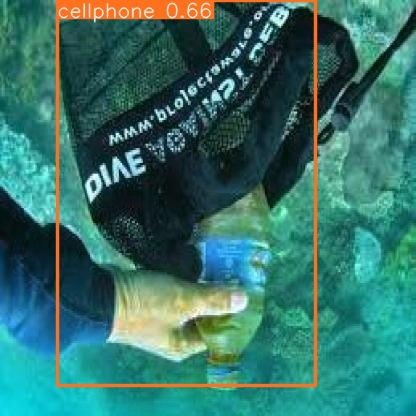

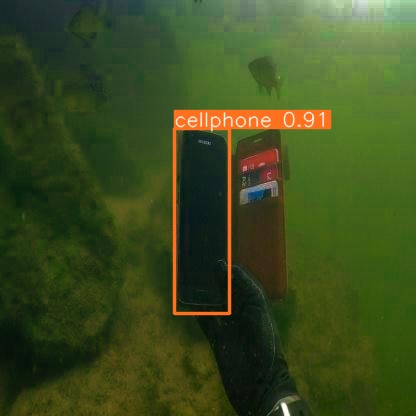

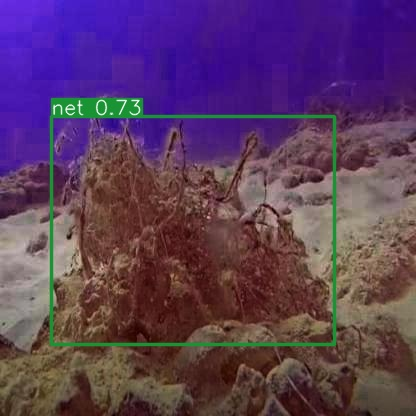

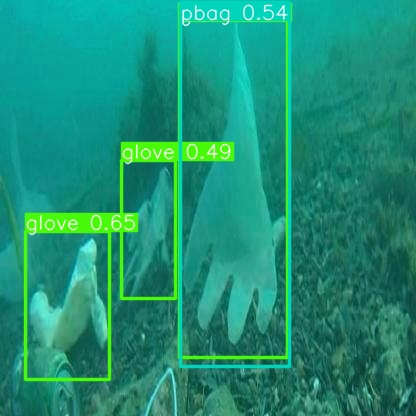

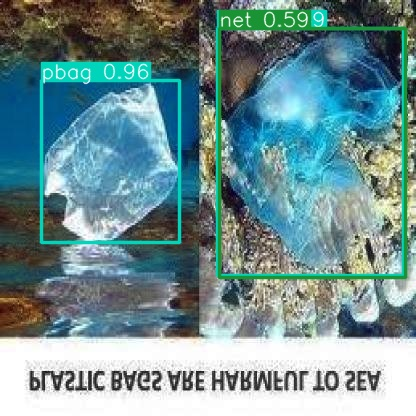

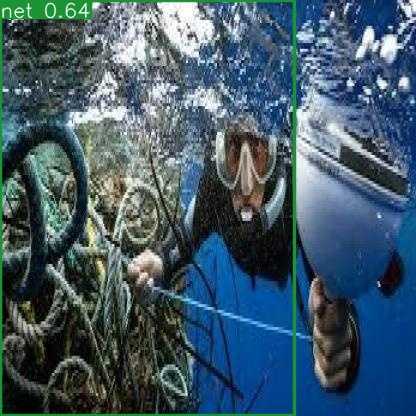

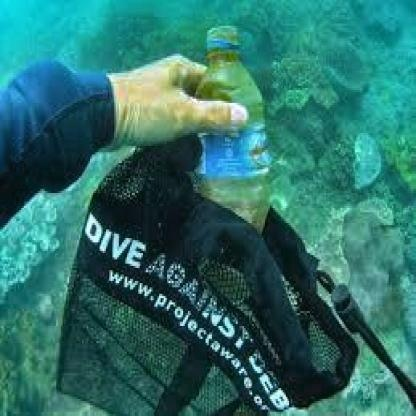

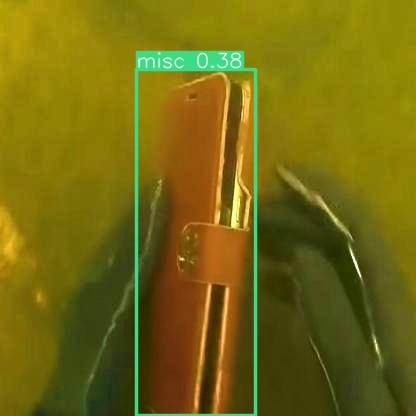

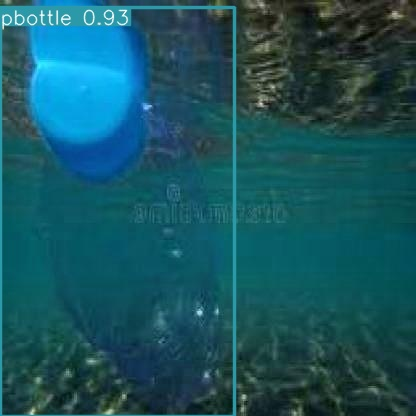

In [23]:
import glob
from IPython.display import Image, display
for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:10]:
      display(Image(filename=image_path))
